<a href="https://colab.research.google.com/github/Katerincasas/Yachay--dataset/blob/main/YACHAY_DATA_SET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALIZANDO JUZGADOS DE PAZ**

In [11]:
!pip install pandas openpyxl
import pandas as pd

In [12]:
df = pd.read_excel('libro directorio.xlsx')

In [13]:
df.head()

,n,distrito_judicial,departamento,provincia,distrito,nombre_del_juzgado_de_paz,estado_del_juzgado,lugar_de_atencion,direccion_del_juzgado,dias_y_horas_de_atencion,...,edad_1a,sexo_1a,apellido_paterno_2a,apellido_materno_2a,nombres_2a,dni_2a,edad_2a,sexo_2a,yachay,fecha_incor_yachay
0,15,JUNIN,JUNIN,CHUPACA,HUAMANCACA CHICO,C.C. HUAMANCACA CHICO - 1RA NOMINACIÓN,ACTIVO,MUNICIPALIDAD,PLAZA PRINCIPAL-EDIFICIO ANTIGUO DEL MUNICIPIO...,LUNES A VIERNES 9:00 AM - 1:00 PM,...,62,MASCULINO,BALTAZAR,TIPALAYA,EPIFANIO ALEJANDRO,19939310,77,MASCULINO,si,2022-10-04
1,16,JUNIN,JUNIN,CHUPACA,HUAMANCACA CHICO,C.C. HUAMANCACA CHICO - 2DA NOMINACIÓN,ACTIVO,LOCAL MUNICIPAL,LOCAL DEL MUNICIPIO ANTIGUO-PLAZA PRINCIPAL (T...,LUNES A VIERNES DE 7:45 AM A 2:00 PM,...,NaN,MASCULINO,ARAUCO,INGA,PERCY ALCIDES,80296203,43,MASCULINO,SI,2022-10-04
2,86,JUNIN,JUNIN,CONCEPCION,ORCOTUNA,ORCOTUNA - 1RA NOMINACIÓN,ACTIVO,SU CASA,JR. JAUJA 4TA. JUNTA VECINAL-AL FRENTE DEL CEN...,LUNES A SABADO 9:00 AM - 1:00 PM Y 4:00 PM - 7...,...,34,FEMENINO,ASTUCURI,PEREZ,ANA MARIA,41032221,40,FEMENINO,SI,2022-10-04
3,4,JUNIN,JUNIN,CHUPACA,AHUAC,C.C. NINANYA,ACTIVO,LOCAL COMUNAL,AHUAC-ANEXO DE NINANYA,SABADO Y DOMINGO 8:00 AM - 10:00 AM,...,50,MASCULINO,VACANTE,VACANTE,VACANTE,VACANTE,VACANTE,VACANTE,NaN,NaT
4,5,JUNIN,JUNIN,CHUPACA,AHUAC,C.C. HUARISCA GRANDE,ACTIVO,SU CASA,BARRIO SAN PEDRO S/N - C.C. HUARISCA GRANDE,LUNES A SABADO 4:30 PM - 8:00 PM,...,36,FEMENINO,TACUNAN,LAZO,CARLOS ALBERTO,19867929,50,MASCULINO,NaN,NaT


In [14]:
df.columns

Index(['n', 'distrito_judicial', 'departamento', 'provincia', 'distrito',
       'nombre_del_juzgado_de_paz', 'estado_del_juzgado', 'lugar_de_atencion',
       'direccion_del_juzgado', 'dias_y_horas_de_atencion',
       'apellido_paterno_t', 'apellido_materno_t', 'nombres_t', 'dni_t',
       'fecha_de_nacimiento_t', 'edad_t', 'sexo_t', 'profesion_t',
       'ocupacion_t', 'celular_t', 'n_familiar_t', 'correo_electronico_t',
       'direccion_de_domicilio_t', 'n_de_ra_t', 'inicio_t', 'termino_t',
       'fecha_de_juramentacion_t', 'observaciones_t', 'n_de_ra_ampliacion',
       'fecha_ampliacion', 'eleccion_popular', 'apellido_paterno_1a',
       'apellido_materno_1a', 'nombres_1a', 'dni_1a', 'edad_1a', 'sexo_1a',
       'apellido_paterno_2a', 'apellido_materno_2a', 'nombres_2a', 'dni_2a',
       'edad_2a', 'sexo_2a', 'yachay', 'fecha_incor_yachay'],
      dtype='object')

In [15]:
len(df)

431

In [16]:
# Normaliza departamento y estado_del_juzgado
df['departamento'] = df['departamento'].astype(str).str.strip().str.upper()
df['estado_del_juzgado'] = df['estado_del_juzgado'].astype(str).str.strip().str.upper()

print("Total de registros después de normalizar:", len(df))
print("Estados únicos:", df['estado_del_juzgado'].unique())
print("Conteo por estado:")
print(df['estado_del_juzgado'].value_counts())

Total de registros después de normalizar: 431
Estados únicos: ['ACTIVO' 'PROCESO DE ELECCION']
Conteo por estado:
estado_del_juzgado
ACTIVO                 421
PROCESO DE ELECCION     10
Name: count, dtype: int64


In [17]:
import matplotlib.pyplot as plt

In [18]:
estado_counts = df['estado_del_juzgado'].value_counts()
labels = estado_counts.index
sizes = estado_counts.values

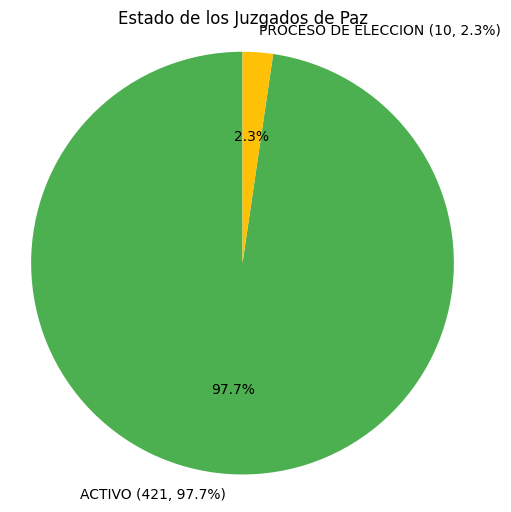

In [19]:
plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    labels=[f"{label} ({size}, {size/sum(sizes)*100:.1f}%)" for label, size in zip(labels, sizes)],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#4CAF50', '#FFC107']
)
plt.title('Estado de los Juzgados de Paz')
plt.axis('equal')
plt.show()

In [20]:
len(df)


431

Calculando cantidad de Juzgados por distrito

In [21]:
distrito_counts = df['distrito'].value_counts()
total_juzgados = distrito_counts.sum()
print(distrito_counts)

distrito
SANTO DOMINGO DE ACOBAMBA       17
EL TAMBO                        16
COLCABAMBA                      15
ANDAMARCA                       11
COMAS                           10
                                ..
LA OROYA                         1
PURISIMA CONCEP. PACCHA          1
SANTA ROSA DE SACCO              1
SANTA BARBARA DE CARHUACAYAN     1
SUITUCANCHA                      1
Name: count, Length: 134, dtype: int64


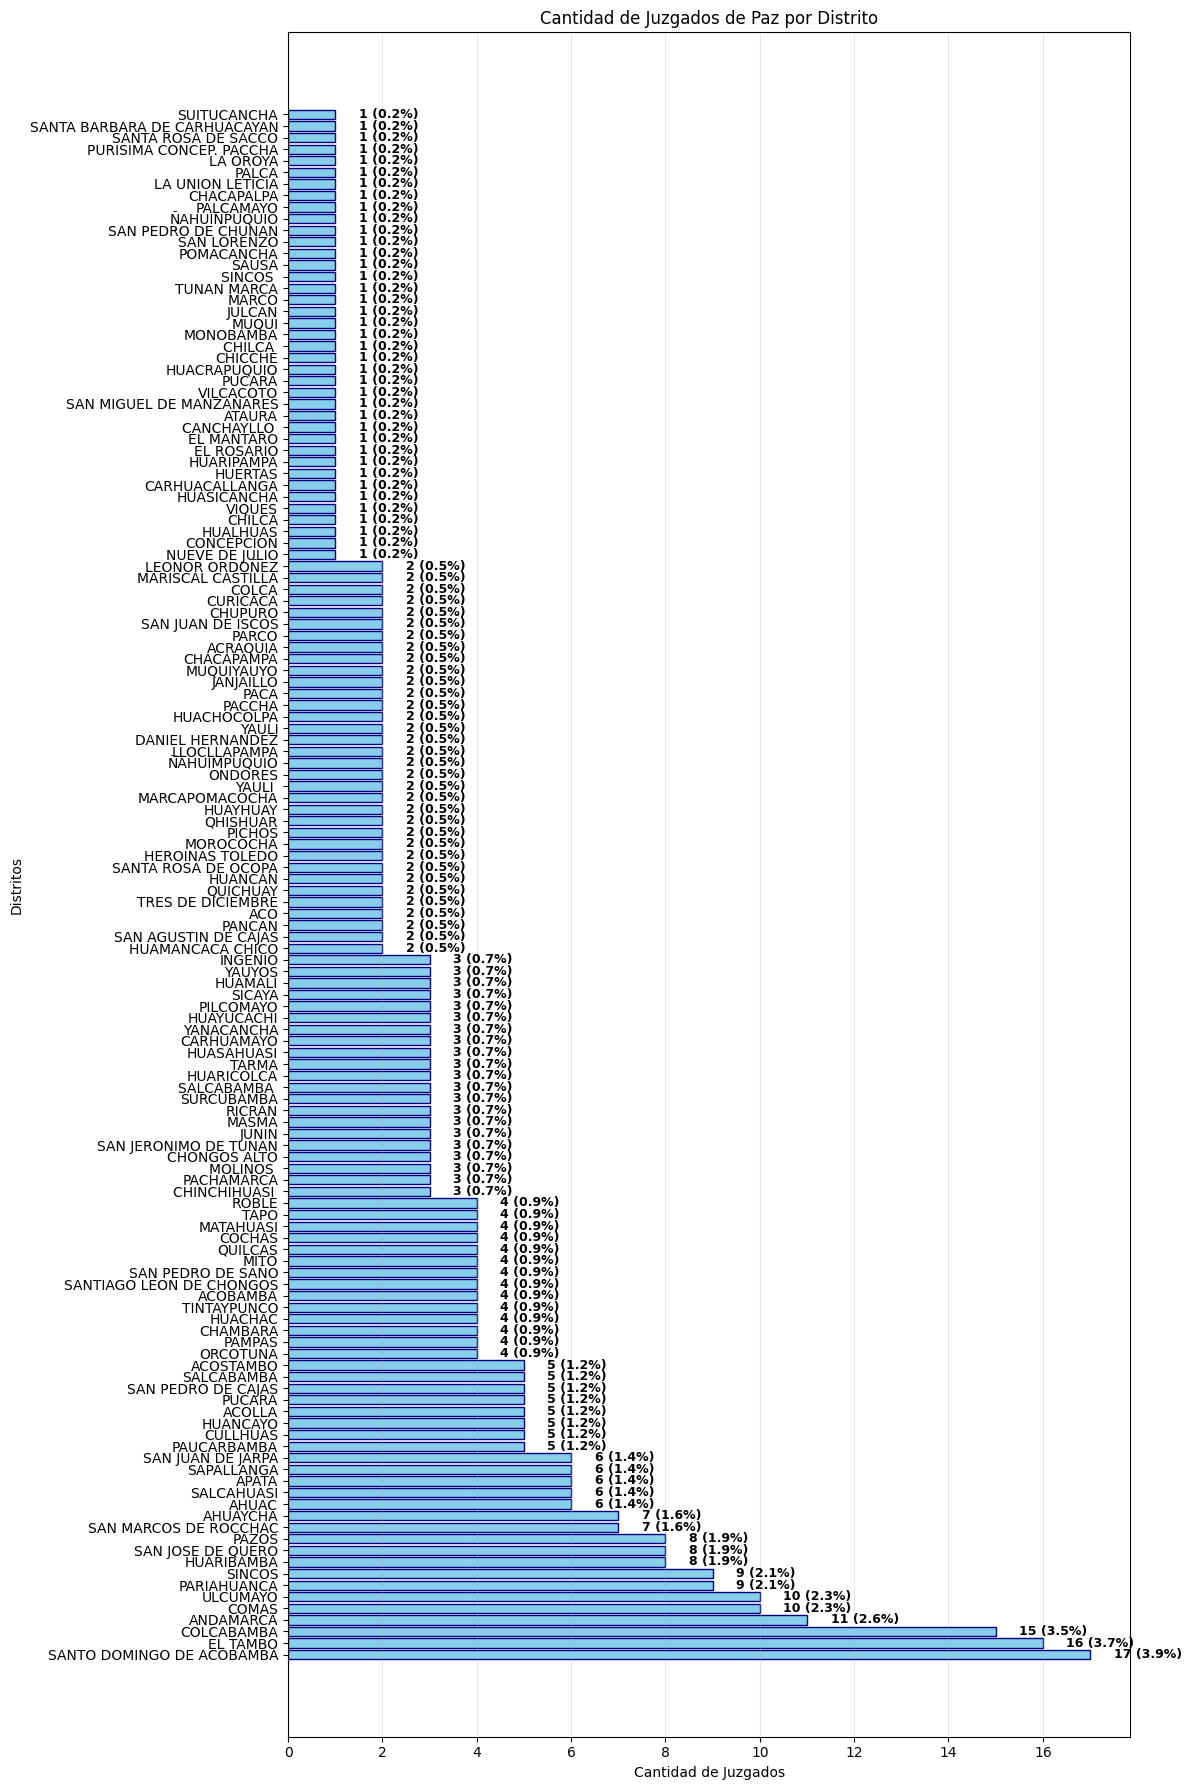

Total de distritos: 134
Total de juzgados: 431


In [22]:
# Crear el gráfico de barras horizontal
plt.figure(figsize=(12, 18))  # Ajusta el alto para que no se amontonen

bars = plt.barh(distrito_counts.index, distrito_counts.values, color='skyblue', edgecolor='navy')

# Añadir etiquetas con cantidad y porcentaje
for i, (cantidad, distrito) in enumerate(zip(distrito_counts.values, distrito_counts.index)):
    porcentaje = (cantidad / total_juzgados) * 100
    plt.text(cantidad + 0.5, i, f'{cantidad} ({porcentaje:.1f}%)',
             va='center', fontsize=9, fontweight='bold')

# Configurar el gráfico
plt.ylabel('Distritos')
plt.xlabel('Cantidad de Juzgados')
plt.title('Cantidad de Juzgados de Paz por Distrito')
plt.tight_layout()
plt.grid(axis='x', alpha=0.3)
plt.show()

print(f"Total de distritos: {len(distrito_counts)}")
print(f"Total de juzgados: {total_juzgados}")

In [23]:
# Normaliza la columna provincia (mayúsculas y sin espacios extra)
df['provincia'] = df['provincia'].astype(str).str.strip().str.upper()

In [24]:
provincia_counts = df['provincia'].value_counts()
print(provincia_counts)
print("Suma total:", provincia_counts.sum())
print("Total de registros en el DataFrame:", len(df))

provincia
HUANCAYO          106
TAYACAJA           92
JAUJA              70
CONCEPCION         52
CHUPACA            42
TARMA              25
JUNIN              18
YAULI-LA OROYA     15
CHURCAMPA          11
Name: count, dtype: int64
Suma total: 431
Total de registros en el DataFrame: 431


In [25]:
print("Filas duplicadas:", df.duplicated().sum())

Filas duplicadas: 0


In [26]:
print(sorted(df['provincia'].unique()))

['CHUPACA', 'CHURCAMPA', 'CONCEPCION', 'HUANCAYO', 'JAUJA', 'JUNIN', 'TARMA', 'TAYACAJA', 'YAULI-LA OROYA']


NameError: name 'total_juzgados_prov' is not defined

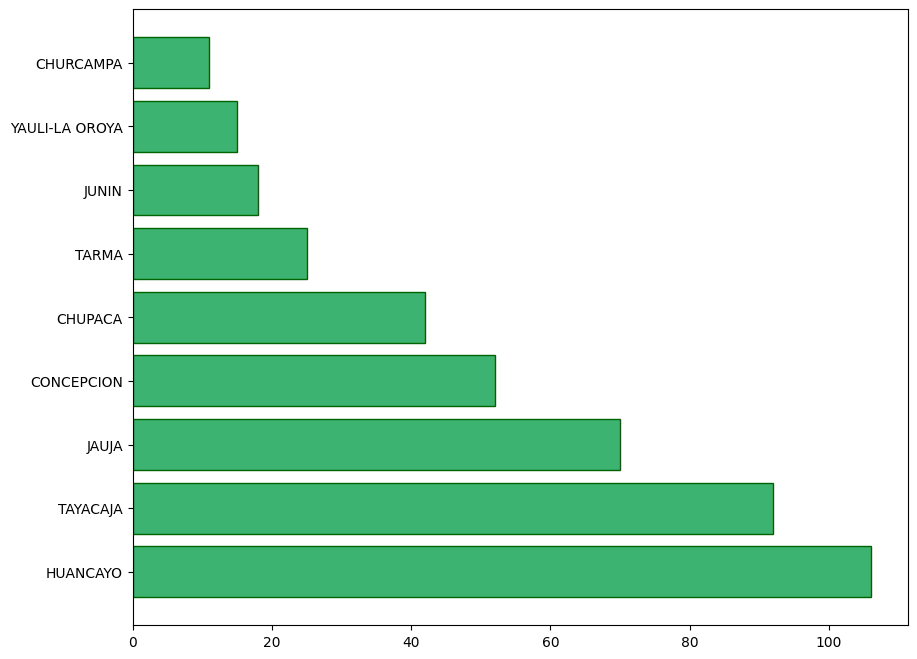

In [29]:
# Gráfico de barras horizontal por provincia
plt.figure(figsize=(10, 8))
bars = plt.barh(provincia_counts.index, provincia_counts.values, color='mediumseagreen', edgecolor='darkgreen')

# Añadir etiquetas con cantidad y porcentaje
for i, (cantidad, provincia) in enumerate(zip(provincia_counts.values, provincia_counts.index)):
    porcentaje = (cantidad / total_juzgados_prov) * 100
    plt.text(cantidad + 0.5, i, f'{cantidad} ({porcentaje:.1f}%)',
             va='center', fontsize=9, fontweight='bold')

# Configurar el gráfico
plt.ylabel('Provincias')
plt.xlabel('Cantidad de Juzgados')
plt.title('Cantidad de Juzgados de Paz por Provincia')
plt.tight_layout()
plt.grid(axis='x', alpha=0.3)
plt.show()

print(f"Total de provincias: {len(provincia_counts)}")
print(f"Total de juzgados: {total_juzgados_prov}")

In [30]:
departamento_counts = df['departamento'].value_counts()
total_juzgados_dep = departamento_counts.sum()
print(departamento_counts)

departamento
JUNIN           328
HUANCAVELICA    103
Name: count, dtype: int64


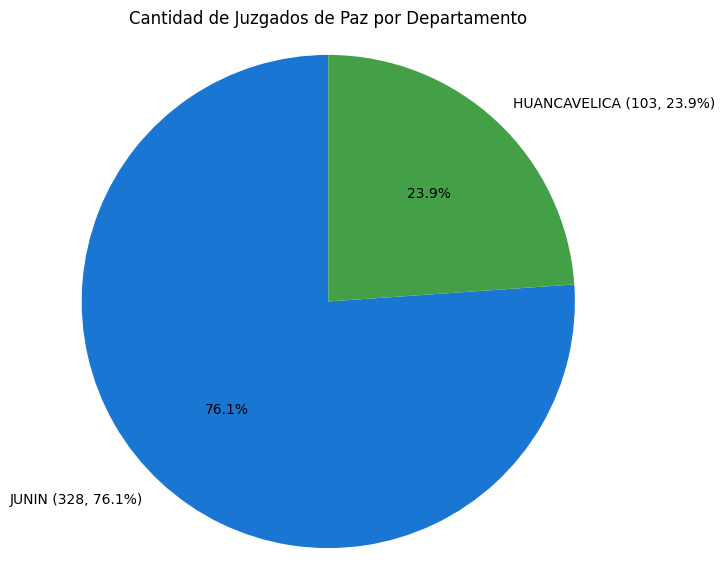

In [31]:
# Gráfico de pastel por departamento
plt.figure(figsize=(7,7))
plt.pie(
    departamento_counts.values,
    labels=[f"{label} ({size}, {size/total_juzgados_dep*100:.1f}%)" for label, size in zip(departamento_counts.index, departamento_counts.values)],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#1976D2', '#43A047', '#FFC107', '#E53935', '#8E24AA']  # Puedes ajustar los colores si tienes más departamentos
)
plt.title('Cantidad de Juzgados de Paz por Departamento')
plt.axis('equal')
plt.show()

# CALCULO DE GENERO Y EDAD

In [32]:
import pandas as pd
from datetime import datetime

# Asegúrate de tener tu DataFrame df cargado y normalizado
activos = df[df['estado_del_juzgado'].str.strip().str.upper() == 'ACTIVO']
print("Registros activos:", len(activos))        # debería dar 431

Registros activos: 421


In [33]:
# Recarga el archivo original
df = pd.read_excel('libro directorio.xlsx')

# Normaliza las columnas que ya habías limpiado
df['departamento'] = df['departamento'].astype(str).str.strip().str.upper()
df['estado_del_juzgado'] = df['estado_del_juzgado'].astype(str).str.strip().str.upper()
df['provincia'] = df['provincia'].astype(str).str.strip().str.upper()
df['sexo_t'] = df['sexo_t'].astype(str).str.strip().str.upper()

print("Archivo recargado. Total registros:", len(df))

Archivo recargado. Total registros: 431


In [34]:
print("Valores originales de fecha_de_nacimiento_t:")
print(df['fecha_de_nacimiento_t'].head(10))
print("Tipo de datos:", df['fecha_de_nacimiento_t'].dtype)

Valores originales de fecha_de_nacimiento_t:
0    1970-01-07 00:00:00
1    1982-01-25 00:00:00
2    1970-04-27 00:00:00
3    1961-09-30 00:00:00
4    1958-09-23 00:00:00
5    1957-12-11 00:00:00
6    1985-02-11 00:00:00
7    1972-02-27 00:00:00
8    1981-08-06 00:00:00
9    1971-11-26 00:00:00
Name: fecha_de_nacimiento_t, dtype: object
Tipo de datos: object


In [36]:
df['fecha_de_nacimiento_t'] = pd.to_datetime(df['fecha_de_nacimiento_t'], errors='coerce')
print(df['fecha_de_nacimiento_t'].head(10))

0   1970-01-07
1   1982-01-25
2   1970-04-27
3   1961-09-30
4   1958-09-23
5   1957-12-11
6   1985-02-11
7   1972-02-27
8   1981-08-06
9   1971-11-26
Name: fecha_de_nacimiento_t, dtype: datetime64[ns]


In [37]:
from datetime import datetime
current_year = datetime.now().year
df['edad_calc'] = df['fecha_de_nacimiento_t'].dt.year.apply(lambda x: current_year - x if pd.notnull(x) else None)
print(df[['fecha_de_nacimiento_t', 'edad_calc']].head(10))

  fecha_de_nacimiento_t  edad_calc
0            1970-01-07       55.0
1            1982-01-25       43.0
2            1970-04-27       55.0
3            1961-09-30       64.0
4            1958-09-23       67.0
5            1957-12-11       68.0
6            1985-02-11       40.0
7            1972-02-27       53.0
8            1981-08-06       44.0
9            1971-11-26       54.0


In [38]:
# Grupo de edad: G1 (<65) , G2 (>=65)
df['grupo_edad'] = df['edad_calc'].apply(lambda x: 'G1 (<65)' if x < 65 else 'G2 (≥65)')
print(df['grupo_edad'].value_counts())

grupo_edad
G1 (<65)    317
G2 (≥65)    114
Name: count, dtype: int64


In [39]:
# Normaliza la columna sexo_t
df['sexo_t'] = df['sexo_t'].astype(str).str.strip().str.upper()

# Conteo total por sexo
sexo_totales = df['sexo_t'].value_counts()
print("Total por sexo:")
print(sexo_totales)

# Conteo por sexo y grupo de edad
sexo_grupo = df.groupby(['sexo_t', 'grupo_edad']).size().unstack(fill_value=0)
print("\nSexo × Grupo de edad:")
print(sexo_grupo)

Total por sexo:
sexo_t
MASCULINO    336
FEMENINO      85
NAN           10
Name: count, dtype: int64

Sexo × Grupo de edad:
grupo_edad  G1 (<65)  G2 (≥65)
sexo_t                        
FEMENINO          72        13
MASCULINO        245        91
NAN                0        10


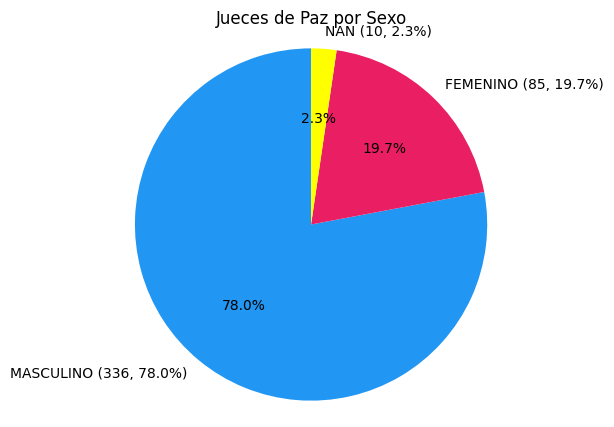

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.pie(
    sexo_totales.values,
    labels=[f"{l} ({v}, {v/sexo_totales.sum()*100:.1f}%)" for l,v in sexo_totales.items()],
    autopct='%1.1f%%', startangle=90, colors=['#2196F3','#E91E63', '#FFFF00']
)
plt.title('Jueces de Paz por Sexo')
plt.axis('equal')
plt.show()

In [41]:
conteo = df_activos.groupby(['grupo_edad', 'sexo_t']).size().unstack(fill_value=0)
print(conteo)

NameError: name 'df_activos' is not defined

In [42]:
conteo = df.groupby(['grupo_edad', 'sexo_t']).size().unstack(fill_value=0)
print(conteo)

sexo_t      FEMENINO  MASCULINO  NAN
grupo_edad                          
G1 (<65)          72        245    0
G2 (≥65)          13         91   10


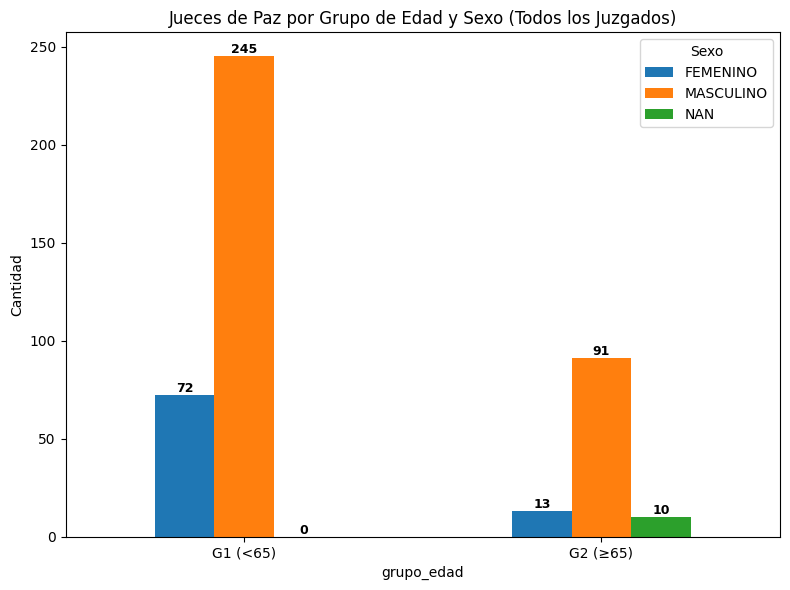

In [43]:
import matplotlib.pyplot as plt

ax = conteo.plot(kind='bar', figsize=(8,6))

# Añade etiquetas de cantidad encima de cada barra
for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.ylabel('Cantidad')
plt.title('Jueces de Paz por Grupo de Edad y Sexo (Todos los Juzgados)')
plt.xticks(rotation=0)
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

# **Cálculo de actuaciones notariales**

In [44]:
# Normaliza la columna yachay
df['yachay'] = df['yachay'].astype(str).str.strip().str.upper()

# Considera como incorporados los que tienen 'SI' o 'S'
incorporados = df[df['yachay'].isin(['SI', 'S']) & (df['fecha_incor_yachay'].notnull())].copy()
print("Total incorporados a Yachay:", len(incorporados))

Total incorporados a Yachay: 84


In [45]:
incorporados['fecha_incor_yachay'] = pd.to_datetime(incorporados['fecha_incor_yachay'], errors='coerce')

# Agrupa por fecha y cuenta cuántos se incorporaron cada día
incorporacion_por_fecha = incorporados.groupby('fecha_incor_yachay').size().sort_index()
print(incorporacion_por_fecha)

fecha_incor_yachay
2022-10-04    10
2023-11-02    32
2024-09-11    42
dtype: int64


In [46]:
incorporacion_acumulada = incorporacion_por_fecha.cumsum()
print(incorporacion_acumulada)

fecha_incor_yachay
2022-10-04    10
2023-11-02    42
2024-09-11    84
dtype: int64


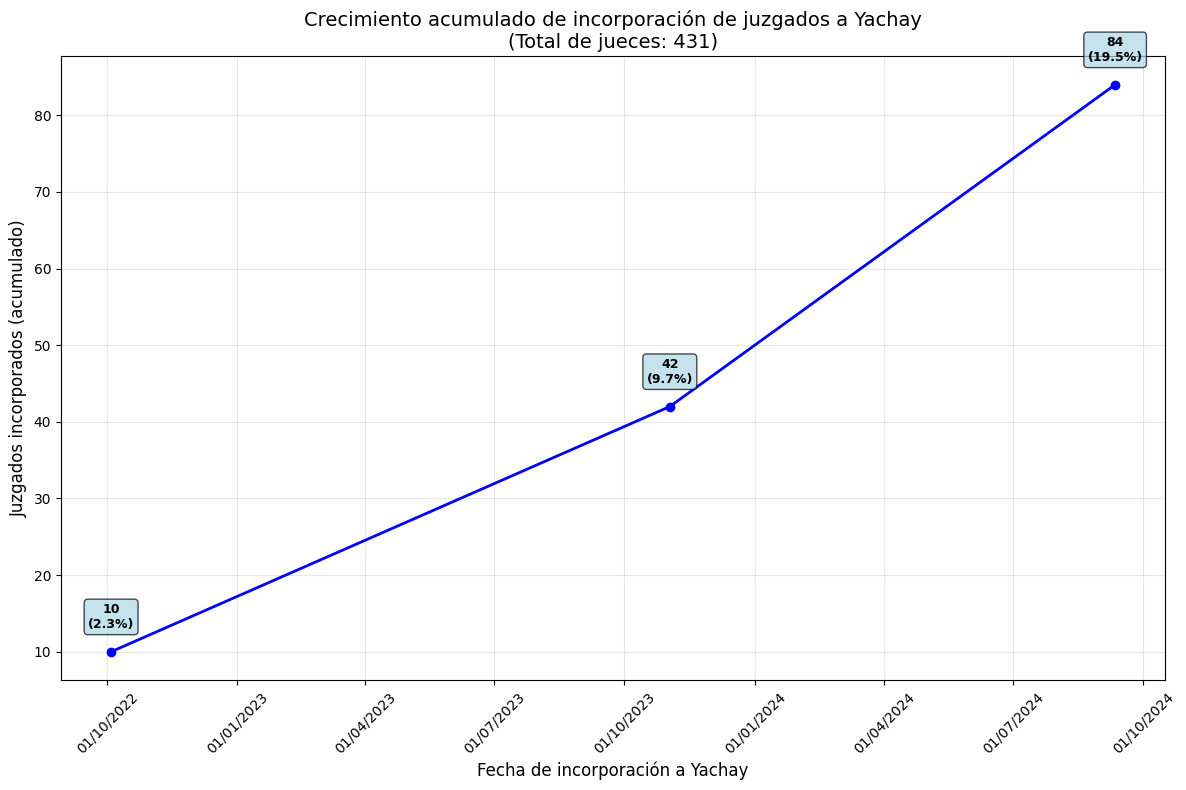

Total de juzgados incorporados: 84
Porcentaje del total: 19.5%


In [47]:
import matplotlib.pyplot as plt

# Total de jueces (tu dato real)
total_jueces = 431

plt.figure(figsize=(12,8))

# Crear el gráfico de línea
line = plt.plot(incorporacion_acumulada.index, incorporacion_acumulada.values,
                marker='o', color='blue', linewidth=2, markersize=6)

# Añadir etiquetas con cantidad y porcentaje en cada punto
for fecha, cantidad in incorporacion_acumulada.items():
    porcentaje = (cantidad / total_jueces) * 100
    plt.annotate(f'{cantidad}\n({porcentaje:.1f}%)',
                xy=(fecha, cantidad),
                xytext=(0, 15),
                textcoords='offset points',
                ha='center', va='bottom',
                fontsize=9, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7))

# Configurar el gráfico
plt.xlabel('Fecha de incorporación a Yachay', fontsize=12)
plt.ylabel('Juzgados incorporados (acumulado)', fontsize=12)
plt.title('Crecimiento acumulado de incorporación de juzgados a Yachay\n(Total de jueces: 431)', fontsize=14)
plt.grid(True, alpha=0.3)

# Formatear las fechas en el eje X
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d/%m/%Y'))

plt.tight_layout()
plt.show()

print(f"Total de juzgados incorporados: {incorporacion_acumulada.iloc[-1]}")
print(f"Porcentaje del total: {(incorporacion_acumulada.iloc[-1] / total_jueces) * 100:.1f}%")

In [48]:
# Filtrar solo los jueces que están en Yachay (SI o S)
yachay_jueces = df[df['yachay'].isin(['SI', 'S'])].copy()
print(f"Total de jueces en Yachay: {len(yachay_jueces)}")
print(f"Porcentaje del total: {(len(yachay_jueces)/431)*100:.1f}%")

Total de jueces en Yachay: 84
Porcentaje del total: 19.5%


Jueces de Yachay por departamento:
departamento
JUNIN           81
HUANCAVELICA     3
Name: count, dtype: int64


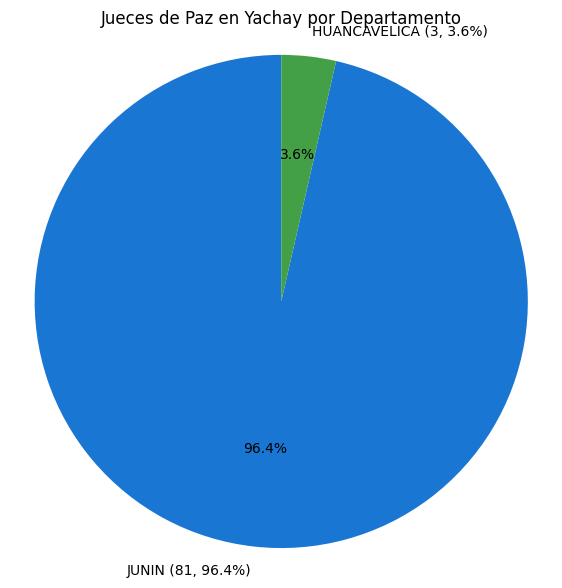

In [49]:
# Conteo por departamento
yachay_depto = yachay_jueces['departamento'].value_counts()
total_yachay = len(yachay_jueces)

print("Jueces de Yachay por departamento:")
print(yachay_depto)

# Gráfico de pastel
plt.figure(figsize=(7,7))
plt.pie(
    yachay_depto.values,
    labels=[f"{dept} ({cant}, {cant/total_yachay*100:.1f}%)" for dept, cant in yachay_depto.items()],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#1976D2', '#43A047']
)
plt.title('Jueces de Paz en Yachay por Departamento')
plt.axis('equal')
plt.show()

Jueces de Yachay por provincia:
provincia
HUANCAYO          33
JAUJA             15
CHUPACA           14
CONCEPCION         8
TARMA              8
TAYACAJA           3
YAULI-LA OROYA     2
JUNIN              1
Name: count, dtype: int64


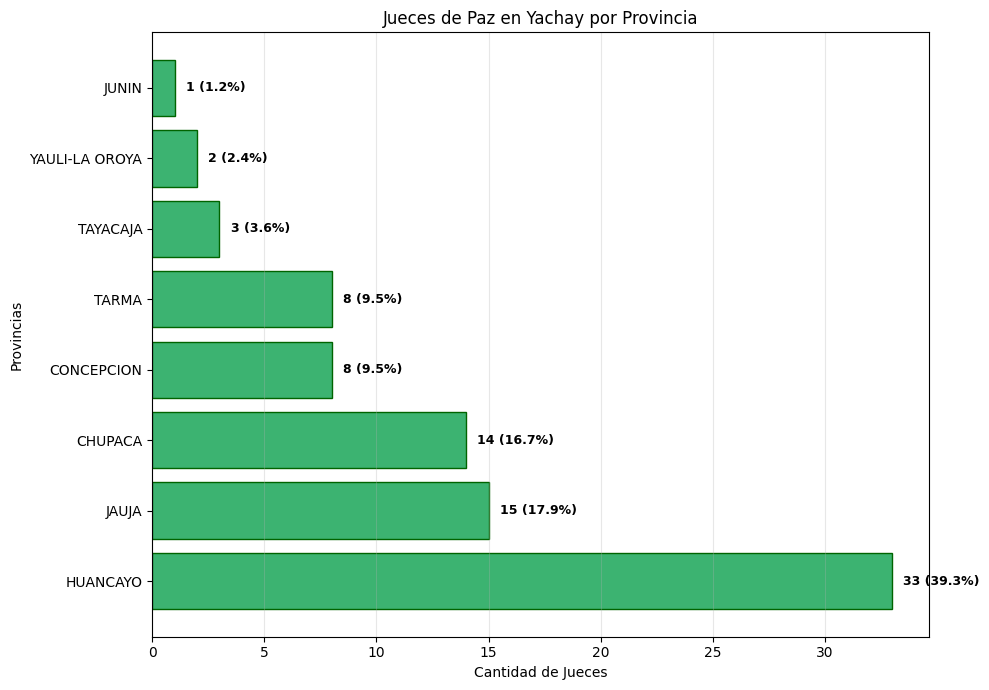

In [50]:
# Conteo por provincia
yachay_prov = yachay_jueces['provincia'].value_counts()
total_yachay = len(yachay_jueces)

print("Jueces de Yachay por provincia:")
print(yachay_prov)

# Gráfico de barras horizontal
plt.figure(figsize=(10, 7))
bars = plt.barh(yachay_prov.index, yachay_prov.values, color='mediumseagreen', edgecolor='darkgreen')

# Etiquetas con cantidad y porcentaje
for i, (cantidad, provincia) in enumerate(zip(yachay_prov.values, yachay_prov.index)):
    porcentaje = (cantidad / total_yachay) * 100
    plt.text(cantidad + 0.5, i, f'{cantidad} ({porcentaje:.1f}%)',
             va='center', fontsize=9, fontweight='bold')

plt.ylabel('Provincias')
plt.xlabel('Cantidad de Jueces')
plt.title('Jueces de Paz en Yachay por Provincia')
plt.tight_layout()
plt.grid(axis='x', alpha=0.3)
plt.show()

Jueces de Yachay por distrito:
distrito
EL TAMBO                    7
ORCOTUNA                    4
SAPALLANGA                  4
PILCOMAYO                   3
SAN JERONIMO DE TUNAN       3
SICAYA                      3
ACOBAMBA                    3
AHUAC                       3
SANTIAGO LEON DE CHONGOS    3
QUILCAS                     2
SAN AGUSTIN DE CAJAS        2
HUAYUCACHI                  2
PUCARA                      2
MATAHUASI                   2
SAN PEDRO DE SAÑO           2
HUAMANCACA CHICO            2
HUACHAC                     2
YAUYOS                      2
MITO                        2
APATA                       2
MOROCOCHA                   2
VIQUES                      1
HUALHUAS                    1
HUANCAN                     1
CHAMBARA                    1
PANCAN                      1
SAN MIGUEL DE MANZANARES    1
SAN JUAN DE ISCOS           1
TRES DE DICIEMBRE           1
EL MANTARO                  1
ACOLLA                      1
ATAURA                      1


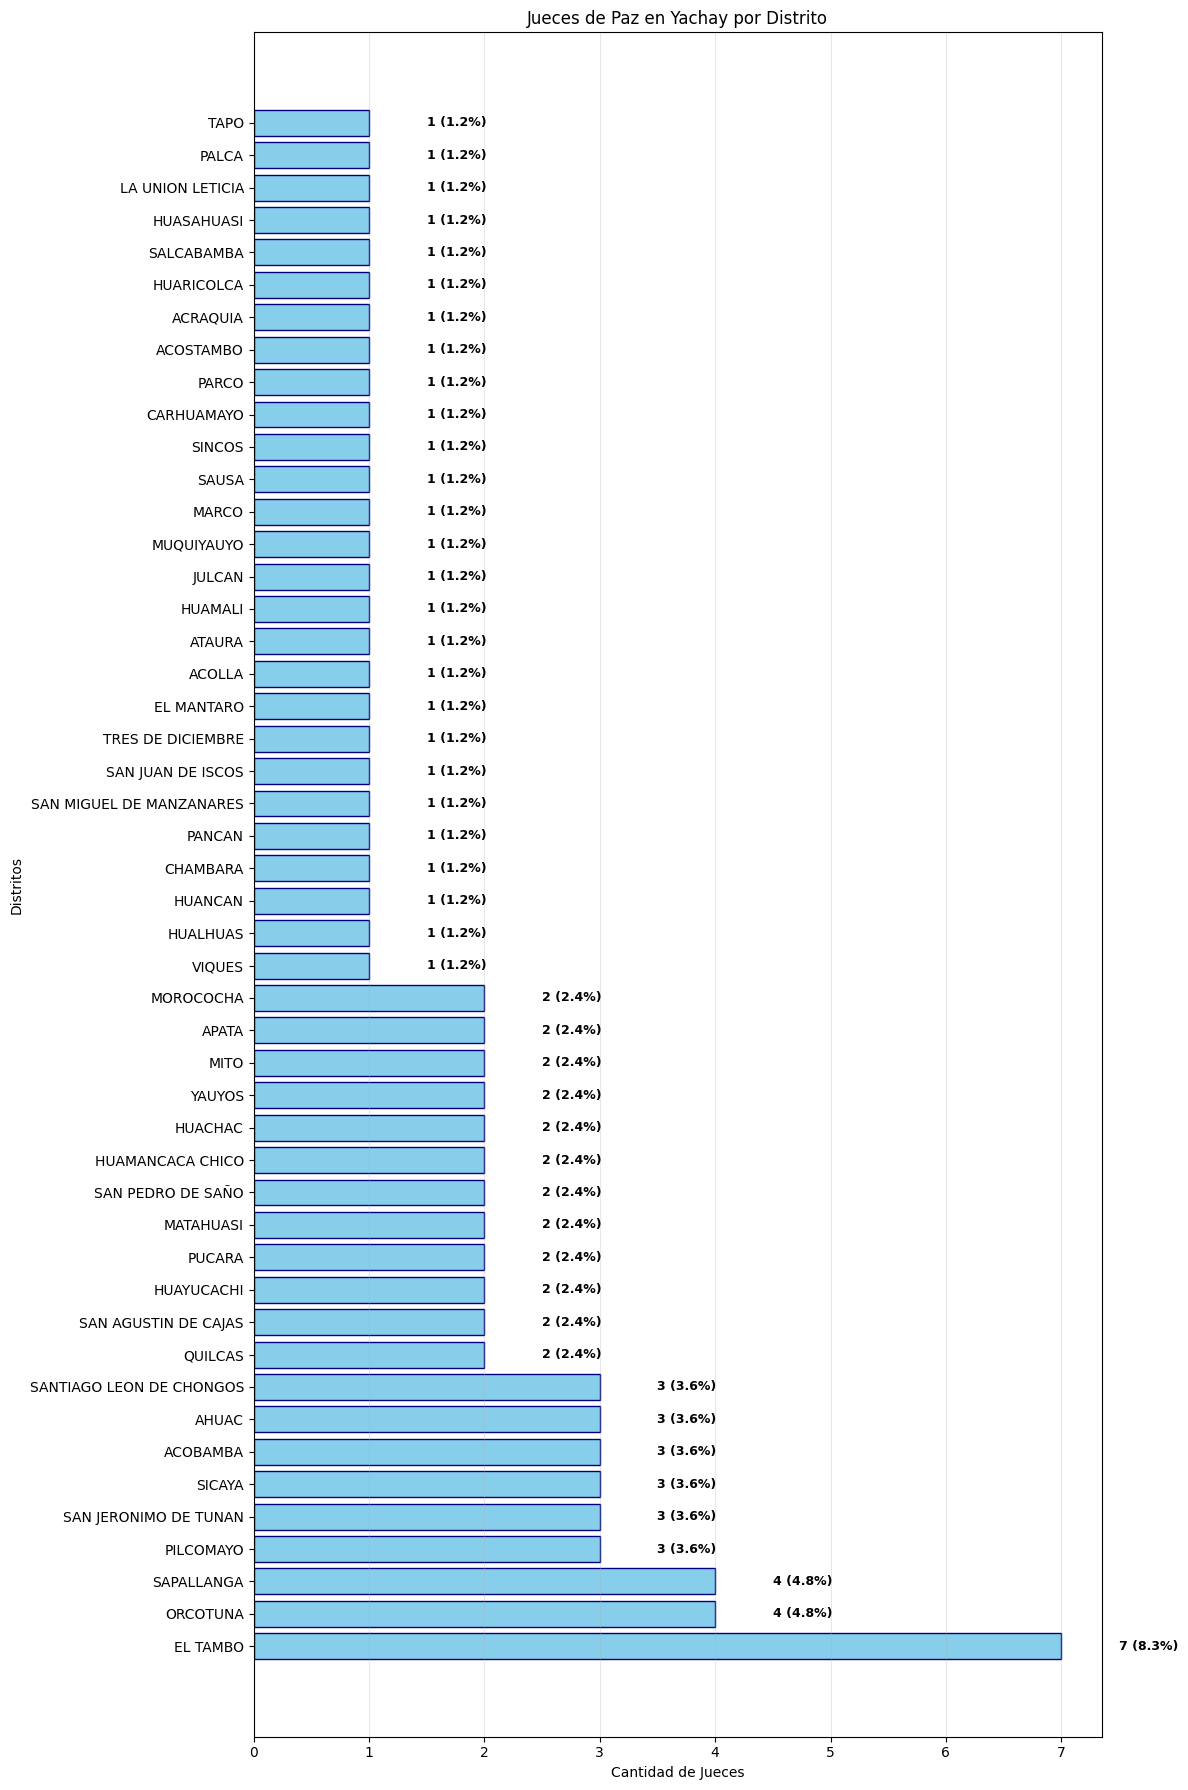

In [51]:
# Conteo por distrito
yachay_dist = yachay_jueces['distrito'].value_counts()
total_yachay = len(yachay_jueces)

print("Jueces de Yachay por distrito:")
print(yachay_dist)

# Gráfico de barras horizontal
plt.figure(figsize=(12, 18))  # Ajusta el tamaño según la cantidad de distritos
bars = plt.barh(yachay_dist.index, yachay_dist.values, color='skyblue', edgecolor='navy')

# Etiquetas con cantidad y porcentaje
for i, (cantidad, distrito) in enumerate(zip(yachay_dist.values, yachay_dist.index)):
    porcentaje = (cantidad / total_yachay) * 100
    plt.text(cantidad + 0.5, i, f'{cantidad} ({porcentaje:.1f}%)',
             va='center', fontsize=9, fontweight='bold')

plt.ylabel('Distritos')
plt.xlabel('Cantidad de Jueces')
plt.title('Jueces de Paz en Yachay por Distrito')
plt.tight_layout()
plt.grid(axis='x', alpha=0.3)
plt.show()

In [52]:
# Normaliza sexo y crea grupo de edad en el DataFrame de Yachay
yachay_jueces['sexo_t'] = yachay_jueces['sexo_t'].fillna('NO REGISTRA').astype(str).str.strip().str.upper()
yachay_jueces['grupo_edad'] = yachay_jueces['edad_calc'].apply(lambda x: 'G1 (<65)' if x < 65 else 'G2 (≥65)')

In [53]:
conteo_yachay = yachay_jueces.groupby(['grupo_edad', 'sexo_t']).size().unstack(fill_value=0)
print(conteo_yachay)

sexo_t      FEMENINO  MASCULINO
grupo_edad                     
G1 (<65)          30         31
G2 (≥65)           5         18


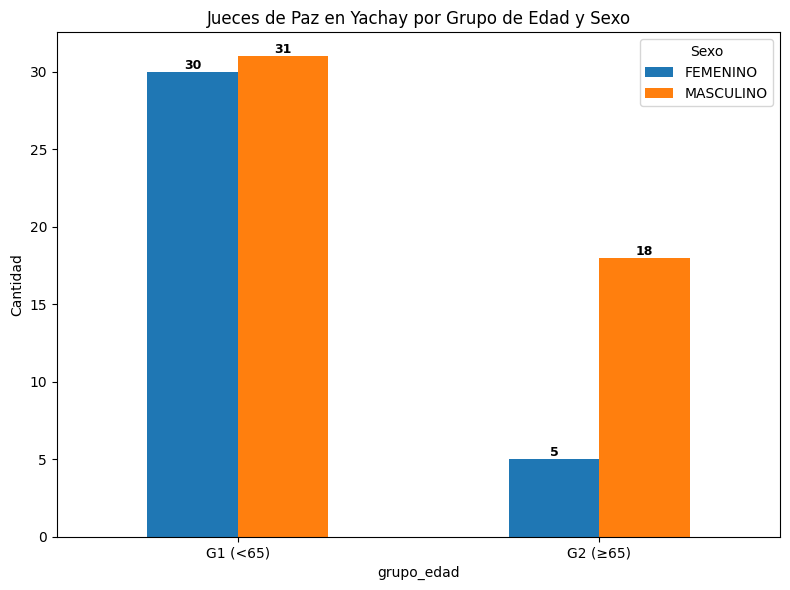

In [54]:
import matplotlib.pyplot as plt

ax = conteo_yachay.plot(kind='bar', figsize=(8,6))

# Añade etiquetas de cantidad encima de cada barra
for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.ylabel('Cantidad')
plt.title('Jueces de Paz en Yachay por Grupo de Edad y Sexo')
plt.xticks(rotation=0)
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

In [55]:
df['en_yachay'] = df['yachay'].apply(lambda x: 'Yachay' if str(x).strip().upper() in ['SI', 'S'] else 'No Yachay')

In [56]:
df['sexo_t'] = df['sexo_t'].fillna('NO REGISTRA').astype(str).str.strip().str.upper()
df['grupo_edad'] = df['edad_calc'].apply(lambda x: 'G1 (<65)' if x < 65 else 'G2 (≥65)')

In [57]:
conteo_comparativo = df.groupby(['en_yachay', 'grupo_edad', 'sexo_t']).size().unstack(fill_value=0)
print(conteo_comparativo)

sexo_t                FEMENINO  MASCULINO  NAN
en_yachay grupo_edad                          
No Yachay G1 (<65)          42        214    0
          G2 (≥65)           8         73   10
Yachay    G1 (<65)          30         31    0
          G2 (≥65)           5         18    0


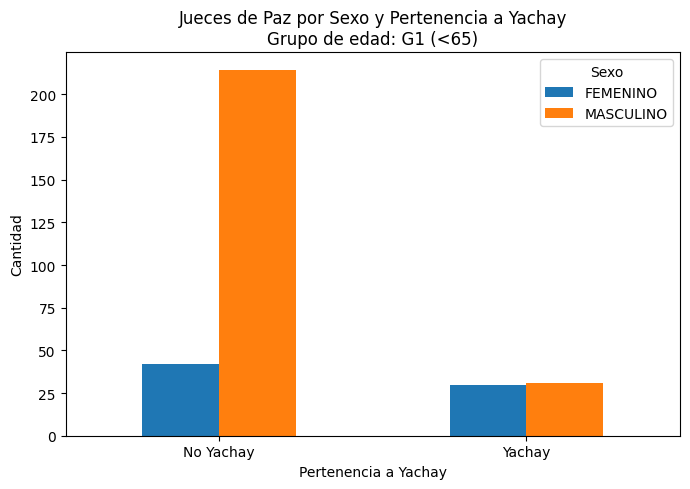

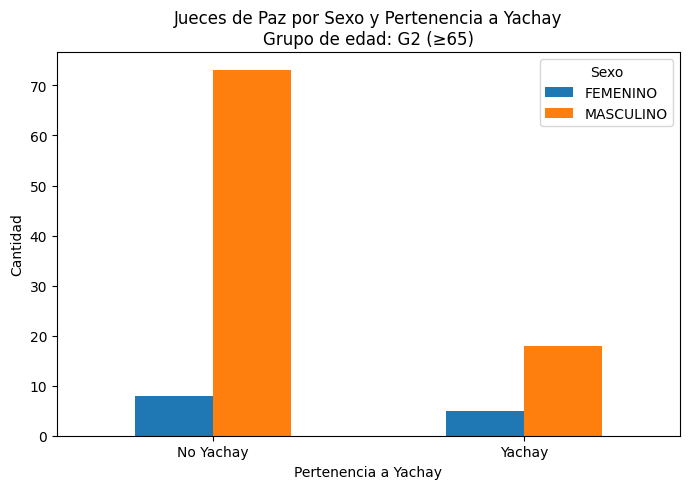

In [58]:
import matplotlib.pyplot as plt

# Para cada grupo de edad, crea un gráfico de barras agrupadas por sexo y pertenencia a Yachay
for grupo in ['G1 (<65)', 'G2 (≥65)']:
    data = df[df['grupo_edad'] == grupo].groupby(['en_yachay', 'sexo_t']).size().unstack(fill_value=0)
    data = data[['FEMENINO', 'MASCULINO', 'NO REGISTRA']] if 'NO REGISTRA' in data.columns else data[['FEMENINO', 'MASCULINO']]
    data.plot(kind='bar', figsize=(7,5))
    plt.title(f'Jueces de Paz por Sexo y Pertenencia a Yachay\nGrupo de edad: {grupo}')
    plt.ylabel('Cantidad')
    plt.xlabel('Pertenencia a Yachay')
    plt.xticks(rotation=0)
    plt.legend(title='Sexo')
    plt.tight_layout()
    plt.show()

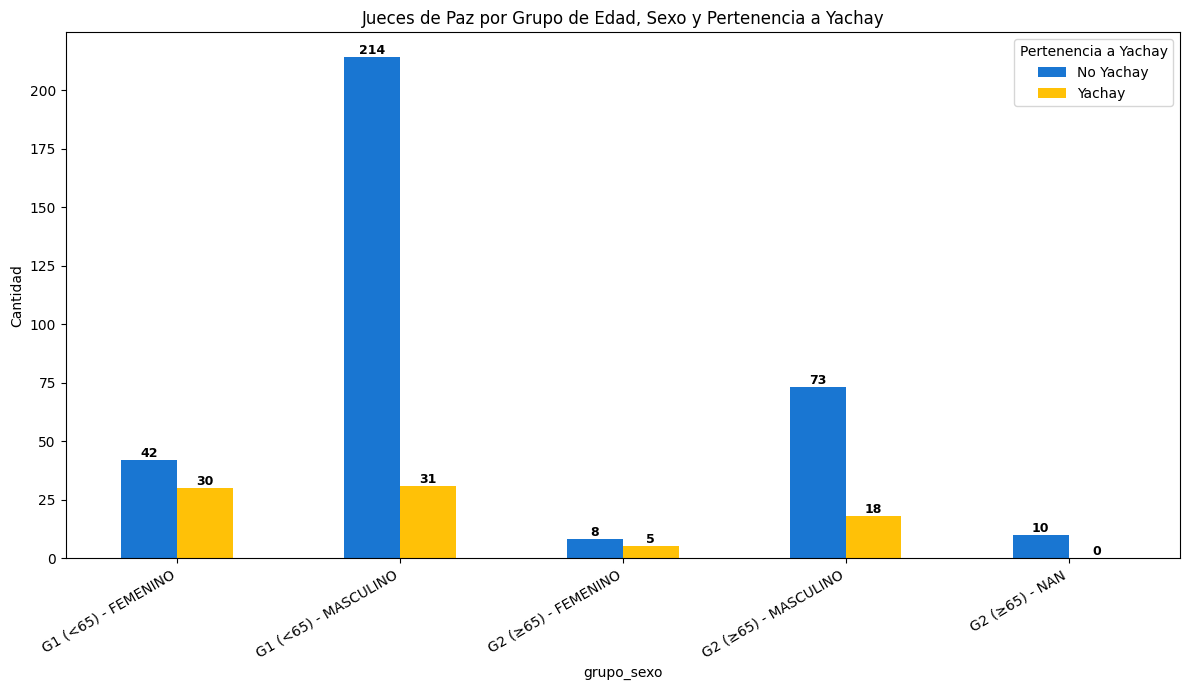

In [59]:
# 1. Crea la columna combinada
df['grupo_sexo'] = df['grupo_edad'] + ' - ' + df['sexo_t']

# 2. Tabla de conteo cruzado
conteo = df.groupby(['grupo_sexo', 'en_yachay']).size().unstack(fill_value=0)

# 3. Gráfico de barras agrupadas y coloridas
import matplotlib.pyplot as plt

colores = ['#1976D2', '#FFC107']  # Azul para Yachay, Amarillo para No Yachay

ax = conteo.plot(kind='bar', figsize=(12,7), color=colores)

# Etiquetas de cantidad encima de cada barra
for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.ylabel('Cantidad')
plt.title('Jueces de Paz por Grupo de Edad, Sexo y Pertenencia a Yachay')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Pertenencia a Yachay')
plt.tight_layout()
plt.show()

# **ACTOS NOTARIALES - Libros por juzgado**

In [60]:
import pandas as pd

# Cargar el archivo CSV
df_libros = pd.read_csv('odajup_libros_notarial_libros.csv')

print("Forma del dataset:", df_libros.shape)
print("\nPrimeras 5 filas:")
print(df_libros.head())

Forma del dataset: (37909, 27)

Primeras 5 filas:
   id_libro  fk_juzgado                                codigo       fecha  \
0        50         112  2022-LIBRO-1-C.C. HUAMANCACA CHICO-1  2022-10-04   
1        50         112  2022-LIBRO-1-C.C. HUAMANCACA CHICO-1  2022-10-04   
2        50         112  2022-LIBRO-1-C.C. HUAMANCACA CHICO-1  2022-10-04   
3        50         112  2022-LIBRO-1-C.C. HUAMANCACA CHICO-1  2022-10-04   
4        50         112  2022-LIBRO-1-C.C. HUAMANCACA CHICO-1  2022-10-04   

   total_folio  usado_folio  rest_folio  b_libro  c_tomo b_generado  ...  \
0          200          200           0    False  TOMO 1      False  ...   
1          200          200           0    False  TOMO 1      False  ...   
2          200          200           0    False  TOMO 1      False  ...   
3          200          200           0    False  TOMO 1      False  ...   
4          200          200           0    False  TOMO 1      False  ...   

   id_descarga                

/tmp/ipython-input-1398009557.py:4: DtypeWarning: Columns (3,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_libros = pd.read_csv('odajup_libros_notarial_libros.csv')


In [61]:
# Ver información general del dataset
print("Información del dataset:")
print(df_libros.info())

print("\nColumnas disponibles:")
print(df_libros.columns.tolist())

print("\nValores únicos en columnas clave:")
print("Cantidad de juzgados únicos (fk_juzgado):", df_libros['fk_juzgado'].nunique())
print("Cantidad de libros únicos (id_libro):", df_libros['id_libro'].nunique())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37909 entries, 0 to 37908
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_libro          37909 non-null  int64  
 1   fk_juzgado        37909 non-null  int64  
 2   codigo            37909 non-null  object 
 3   fecha             11138 non-null  object 
 4   total_folio       37909 non-null  int64  
 5   usado_folio       37909 non-null  int64  
 6   rest_folio        37909 non-null  int64  
 7   b_libro           37909 non-null  bool   
 8   c_tomo            37909 non-null  object 
 9   b_generado        37839 non-null  object 
 10  c_generado        0 non-null      float64
 11  c_estado          37909 non-null  object 
 12  c_solicitado_por  30920 non-null  float64
 13  c_aperturado_por  37909 non-null  int64  
 14  c_caratula        35887 non-null  object 
 15  c_hojacero        35887 non-null  object 
 16  d_subida       

In [62]:
# Elimina columnas completamente vacías
df_libros = df_libros.dropna(axis=1, how='all')

# Elimina columnas duplicadas (por ejemplo, 'id_libro.1' es igual a 'id_libro')
df_libros = df_libros.loc[:, ~df_libros.columns.duplicated()]

In [63]:
import pandas as pd

# Cargar el archivo con encoding utf-8
df_tomos = pd.read_csv('vw_libros_notarial tomos.csv', sep='$', encoding='utf-8')

print(df_tomos.head())

  departamento   provincia    distrito   localidad  nominacion  id_libro  \
0        JUNIN    HUANCAYO  SAPALLANGA    LA PUNTA         NaN        59   
1        JUNIN    HUANCAYO  SAPALLANGA    LA PUNTA         NaN        84   
2        JUNIN    HUANCAYO  SAPALLANGA    LA PUNTA         NaN        73   
3        JUNIN  CONCEPCION    ORCOTUNA    ORCOTUNA         1.0        52   
4        JUNIN    HUANCAYO  SAPALLANGA  SAPALLANGA         1.0        77   

   fk_juzgado                     codigo       fecha fecha_format  \
0         288      2022-LIBRO-1-LA PUNTA  2022-10-04   04/10/2022   
1         288      2023-LIBRO-6-LA PUNTA  2023-04-18   18/04/2023   
2         288      2023-LIBRO-4-LA PUNTA  2023-01-24   24/01/2023   
3         174    2022-LIBRO-1-ORCOTUNA-1  2022-10-04   04/10/2022   
4         289  2023-LIBRO-4-SAPALLANGA-1  2023-02-24   24/02/2023   

   total_folio  usado_folio  rest_folio  b_libro        tipo  idtipo  c_tomo  \
0          200          200           0    False

In [64]:
print(df_tomos.columns.tolist())

['departamento', 'provincia', 'distrito', 'localidad', 'nominacion', 'id_libro', 'fk_juzgado', 'codigo', 'fecha', 'fecha_format', 'total_folio', 'usado_folio', 'rest_folio', 'b_libro', 'tipo', 'idtipo', 'c_tomo', 'b_generado', 'c_generado', 'c_estado']


In [65]:
# Tomos únicos por distrito, ordenados alfabéticamente por departamento, provincia y distrito
tomos_distrito = df_tomos.drop_duplicates(subset=['distrito', 'c_tomo']) \
    .groupby(['departamento', 'provincia', 'distrito'])['c_tomo'].count() \
    .sort_index()  # Ordena por el índice (departamento, provincia, distrito)

print("Tomos únicos por distrito (ordenado alfabéticamente):")
print(tomos_distrito)

Tomos únicos por distrito (ordenado alfabéticamente):
departamento  provincia   distrito             
HUANCAVELICA  CHURCAMPA   PAUCARBAMBA               1
              TAYACAJA    ACOSTAMBO                 1
                          ACRAQUIA                  1
                          COLCABAMBA                1
                          SALCABAMBA                1
JUNIN         CHUPACA     AHUAC                     5
                          CHONGOS BAJO              6
                          HUACHAC                   2
                          HUAMANCACA CHICO          9
                          SAN JUAN DE YSCOS         4
                          TRES DE DICIEMBRE         3
              CONCEPCION  CHAMBARA                  1
                          MANZANARES                2
                          MATAHUASI                10
                          MITO                      2
                          ORCOTUNA                 12
              HUANCAYO    EL TAMBO

In [66]:
# Primero, calcula los tomos únicos por distrito (como ya tienes)
tomos_distrito = df_tomos.drop_duplicates(subset=['departamento', 'provincia', 'distrito', 'c_tomo']) \
    .groupby(['departamento', 'provincia', 'distrito'])['c_tomo'].count().reset_index(name='tomos_distrito')

# Ahora, suma los tomos de todos los distritos de cada provincia
tomos_provincia_suma = tomos_distrito.groupby(['departamento', 'provincia'])['tomos_distrito'].sum().reset_index(name='tomos_provincia')

print("Tomos por provincia (suma de tomos de todos sus distritos):")
print(tomos_provincia_suma)

Tomos por provincia (suma de tomos de todos sus distritos):
   departamento   provincia  tomos_provincia
0  HUANCAVELICA   CHURCAMPA                1
1  HUANCAVELICA    TAYACAJA                4
2         JUNIN     CHUPACA               29
3         JUNIN  CONCEPCION               27
4         JUNIN    HUANCAYO              197
5         JUNIN       JAUJA               21
6         JUNIN       JUNIN                5
7         JUNIN       TARMA               14
8         JUNIN       YAULI                2


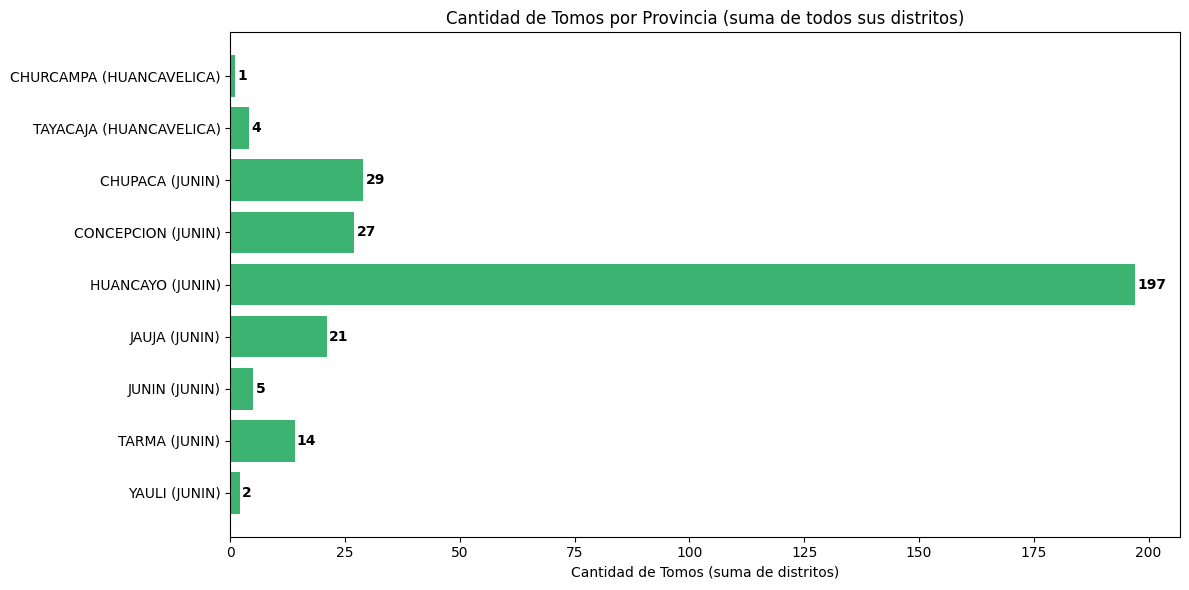

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
bars = plt.barh(
    tomos_provincia_suma['provincia'] + ' (' + tomos_provincia_suma['departamento'] + ')',
    tomos_provincia_suma['tomos_provincia'],
    color='mediumseagreen'
)

# Etiquetas de cantidad en cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', va='center', fontsize=10, fontweight='bold')

plt.xlabel('Cantidad de Tomos (suma de distritos)')
plt.title('Cantidad de Tomos por Provincia (suma de todos sus distritos)')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

In [68]:
# Ya tienes tomos_provincia_suma del paso anterior
# Ahora suma los tomos de todas las provincias de cada departamento
tomos_departamento_suma = tomos_provincia_suma.groupby('departamento')['tomos_provincia'].sum().reset_index(name='tomos_departamento')

print("Tomos por departamento (suma de tomos de todas sus provincias):")
print(tomos_departamento_suma)

Tomos por departamento (suma de tomos de todas sus provincias):
   departamento  tomos_departamento
0  HUANCAVELICA                   5
1         JUNIN                 295


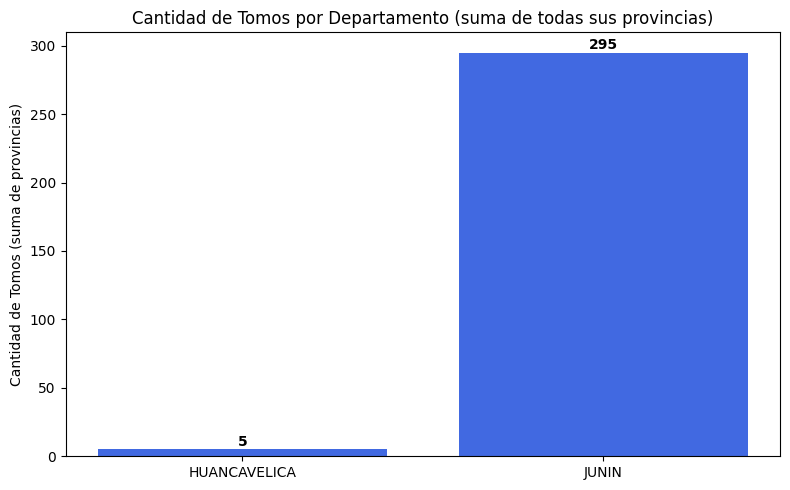

In [69]:
plt.figure(figsize=(8,5))
bars = plt.bar(tomos_departamento_suma['departamento'], tomos_departamento_suma['tomos_departamento'], color='royalblue')

# Añadir etiquetas de cantidad en cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.ylabel('Cantidad de Tomos (suma de provincias)')
plt.title('Cantidad de Tomos por Departamento (suma de todas sus provincias)')
plt.tight_layout()
plt.show()

# **Analizar proyeccion de ahorro de papel**

In [70]:
# Filtrar solo los tomos EN USO
df_uso = df_tomos[df_tomos['c_estado'].str.strip().str.upper() == 'EN USO'].copy()
print("Filas EN USO:", df_uso.shape[0])

Filas EN USO: 80


In [71]:
# Suma total de folios usados
total_folios_usados = df_uso['usado_folio'].sum()
print(f"Total de folios usados (EN USO): {total_folios_usados}")

Total de folios usados (EN USO): 88120


In [72]:
folios_departamento = df_uso.groupby('departamento')['usado_folio'].sum().sort_values(ascending=False)
print("Folios usados por departamento:")
print(folios_departamento)

Folios usados por departamento:
departamento
JUNIN           87904
HUANCAVELICA      216
Name: usado_folio, dtype: int64


In [73]:
folios_provincia = df_uso.groupby(['departamento', 'provincia'])['usado_folio'].sum().sort_values(ascending=False)
print("Folios usados por provincia:")
print(folios_provincia)

Folios usados por provincia:
departamento  provincia 
JUNIN         HUANCAYO      65351
              CONCEPCION     8824
              CHUPACA        6520
              JAUJA          3189
              TARMA          2846
              JUNIN           826
              YAULI           348
HUANCAVELICA  TAYACAJA        116
              CHURCAMPA       100
Name: usado_folio, dtype: int64


In [74]:
# Agrupa y suma folios usados por distrito
folios_distrito = df_uso.groupby(['departamento', 'provincia', 'distrito'])['usado_folio'].sum().reset_index()

# Ordena por departamento, provincia y distrito (todo alfabéticamente)
folios_distrito = folios_distrito.sort_values(['departamento', 'provincia', 'distrito'])

print("Folios usados por distrito (provincias y distritos ordenados alfabéticamente):")
print(folios_distrito)

Folios usados por distrito (provincias y distritos ordenados alfabéticamente):
    departamento   provincia               distrito  usado_folio
0   HUANCAVELICA   CHURCAMPA            PAUCARBAMBA          100
1   HUANCAVELICA    TAYACAJA              ACOSTAMBO           21
2   HUANCAVELICA    TAYACAJA             SALCABAMBA           95
3          JUNIN     CHUPACA                  AHUAC         1046
4          JUNIN     CHUPACA           CHONGOS BAJO         1126
5          JUNIN     CHUPACA                HUACHAC          379
6          JUNIN     CHUPACA       HUAMANCACA CHICO         2652
7          JUNIN     CHUPACA      SAN JUAN DE YSCOS          738
8          JUNIN     CHUPACA      TRES DE DICIEMBRE          579
9          JUNIN  CONCEPCION               CHAMBARA           46
10         JUNIN  CONCEPCION             MANZANARES          373
11         JUNIN  CONCEPCION              MATAHUASI         2133
12         JUNIN  CONCEPCION                   MITO          375
13         

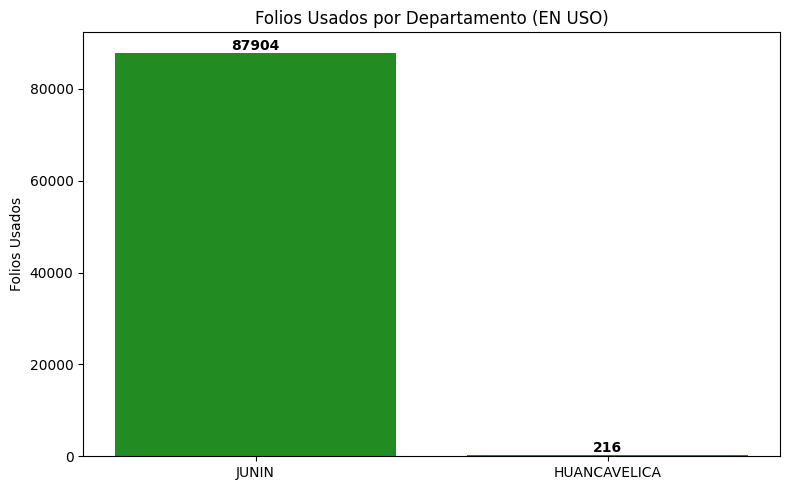

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
bars = plt.bar(folios_departamento.index, folios_departamento.values, color='forestgreen')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.ylabel('Folios Usados')
plt.title('Folios Usados por Departamento (EN USO)')
plt.tight_layout()
plt.show()

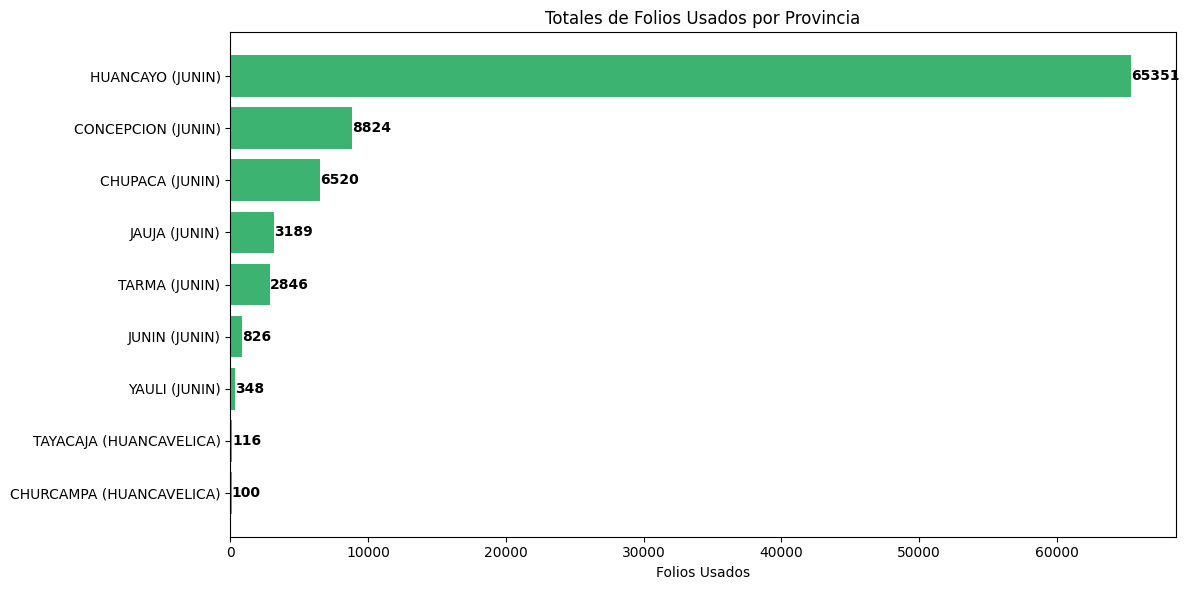

In [76]:
import matplotlib.pyplot as plt

# Suma de folios usados por provincia
folios_provincia = df_uso.groupby(['departamento', 'provincia'])['usado_folio'].sum().reset_index()

# Ordena de mayor a menor
folios_provincia = folios_provincia.sort_values('usado_folio', ascending=False)

# Etiqueta para el eje Y: provincia (departamento)
folios_provincia['provincia_label'] = folios_provincia['provincia'] + ' (' + folios_provincia['departamento'] + ')'

plt.figure(figsize=(12,6))
bars = plt.barh(folios_provincia['provincia_label'], folios_provincia['usado_folio'], color='mediumseagreen')

# Etiquetas de cantidad en cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', va='center', fontsize=10, fontweight='bold')

plt.xlabel('Folios Usados')
plt.title('Totales de Folios Usados por Provincia')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

#**Actos notariales**

In [77]:
import pandas as pd

# Carga el archivo
df_actos = pd.read_csv('odajup_libros_notarial_libros.csv', encoding='utf-8')

# Filtra solo los actos notariales completos (con url_descarga no nulo y no vacío)
df_completos = df_actos[df_actos['url_descarga'].notna() & (df_actos['url_descarga'].str.strip() != '')].copy()

/tmp/ipython-input-709927569.py:4: DtypeWarning: Columns (3,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_actos = pd.read_csv('odajup_libros_notarial_libros.csv', encoding='utf-8')


In [79]:
# Convierte la columna d_subida a datetime
df_completos['d_subida'] = pd.to_datetime(df_completos['d_subida'], errors='coerce')

In [80]:
# Filtra desde 2022
df_completos = df_completos[df_completos['d_subida'] >= '2022-01-01']

# Crea columnas de año y semestre
df_completos['año'] = df_completos['d_subida'].dt.year
df_completos['semestre'] = df_completos['d_subida'].dt.month.apply(lambda m: 'H1' if m <= 6 else 'H2')
df_completos['año_sem'] = df_completos['año'].astype(str) + '-' + df_completos['semestre']

In [81]:
# Cuenta actos completos por semestre
actos_semestre = (df_completos
                  .groupby('año_sem')
                  .size()
                  .rename('total_actos')
                  .reset_index()
                  .sort_values('año_sem'))

print(actos_semestre)

   año_sem  total_actos
0  2022-H2         1307
1  2023-H1         1994
2  2023-H2         5265
3  2024-H1         5981
4  2024-H2        12254
5  2025-H1        10366
6  2025-H2          716


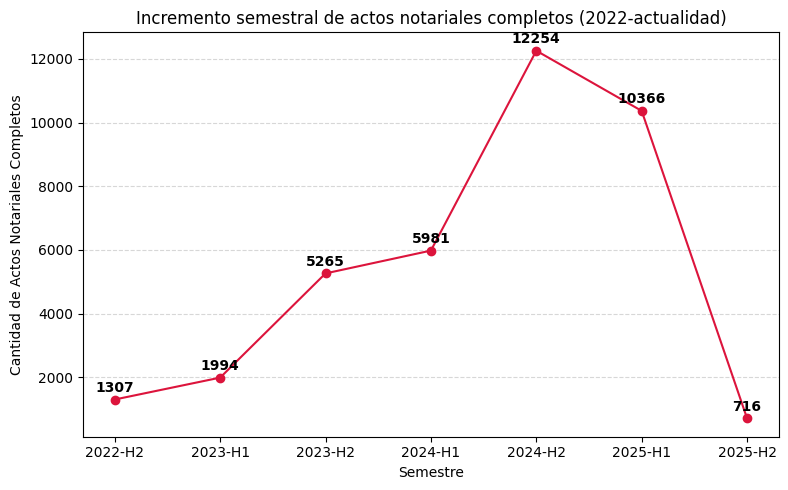

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(actos_semestre['año_sem'], actos_semestre['total_actos'], marker='o', color='crimson')
for i, v in enumerate(actos_semestre['total_actos']):
    plt.text(i, v + max(actos_semestre['total_actos']) * 0.02, str(v), ha='center', fontweight='bold')
plt.title('Incremento semestral de actos notariales completos (2022-actualidad)')
plt.xlabel('Semestre')
plt.ylabel('Cantidad de Actos Notariales Completos')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [83]:
# Cuenta actos completos por semestre
actos_semestre = (df_completos
                  .groupby('año_sem')
                  .size()
                  .rename('total_actos')
                  .reset_index()
                  .sort_values('año_sem'))

print("ACTOS NOTARIALES COMPLETOS POR SEMESTRE:")
print("="*50)
print(actos_semestre)

# Calcula totales por año
actos_año = (df_completos
             .groupby('año')
             .size()
             .rename('total_actos_año')
             .reset_index())

print("\nACTOS NOTARIALES COMPLETOS POR AÑO:")
print("="*40)
print(actos_año)

# Gran total
gran_total = df_completos.shape[0]
print(f"\nGRAN TOTAL DE ACTOS NOTARIALES COMPLETOS: {gran_total}")
print("="*50)

ACTOS NOTARIALES COMPLETOS POR SEMESTRE:
   año_sem  total_actos
0  2022-H2         1307
1  2023-H1         1994
2  2023-H2         5265
3  2024-H1         5981
4  2024-H2        12254
5  2025-H1        10366
6  2025-H2          716

ACTOS NOTARIALES COMPLETOS POR AÑO:
    año  total_actos_año
0  2022             1307
1  2023             7259
2  2024            18235
3  2025            11082

GRAN TOTAL DE ACTOS NOTARIALES COMPLETOS: 37883


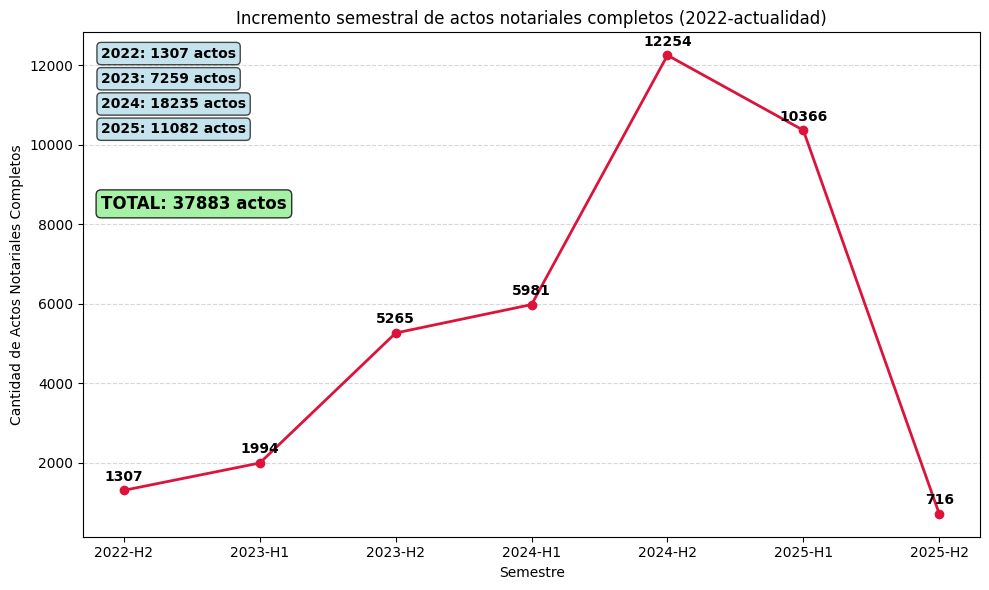

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(actos_semestre['año_sem'], actos_semestre['total_actos'], marker='o', color='crimson', linewidth=2)

# Etiquetas en cada punto
for i, v in enumerate(actos_semestre['total_actos']):
    plt.text(i, v + max(actos_semestre['total_actos']) * 0.02, str(v), ha='center', fontweight='bold')

# Añade totales por año como texto en el gráfico
for año_data in actos_año.itertuples():
    año = año_data.año
    total_año = año_data.total_actos_año
    plt.text(0.02, 0.95 - (año-2022)*0.05, f'{año}: {total_año} actos',
             transform=plt.gca().transAxes, fontsize=10, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

# Gran total en el gráfico
plt.text(0.02, 0.85 - len(actos_año)*0.05, f'TOTAL: {gran_total} actos',
         transform=plt.gca().transAxes, fontsize=12, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.8))

plt.title('Incremento semestral de actos notariales completos (2022-actualidad)')
plt.xlabel('Semestre')
plt.ylabel('Cantidad de Actos Notariales Completos')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# **Ahorro de dinero**

In [85]:
# Tomos digitales únicos (puedes filtrar por EN USO o por todos los tomos digitales)
n_tomos_digitales = df_tomos['c_tomo'].nunique()
print(f"Total de tomos digitales: {n_tomos_digitales}")

Total de tomos digitales: 42


In [86]:
# Suma de folios digitales usados (puedes filtrar por EN USO si lo prefieres)
total_folios_digitales = df_tomos['usado_folio'].sum()
print(f"Total de folios digitales usados: {total_folios_digitales}")

Total de folios digitales usados: 815723


In [87]:
costo_empastado = 35  # soles por tomo
costo_movilidad = 10  # soles por tomo
precio_millar_hojas = 25  # soles por millar de hojas bond (ajusta según tu realidad)

## Ahorro de Papel

In [88]:
# Cada millar = 1000 hojas
ahorro_papel = (total_folios_digitales / 1000) * precio_millar_hojas
print(f"Ahorro en papel: S/ {ahorro_papel:.2f}")

Ahorro en papel: S/ 20393.07


## Ahorro total en empastado y movilidad

In [89]:
ahorro_empastado = n_tomos_digitales * costo_empastado
ahorro_movilidad = n_tomos_digitales * costo_movilidad
print(f"Ahorro en empastado: S/ {ahorro_empastado:.2f}")
print(f"Ahorro en movilidad: S/ {ahorro_movilidad:.2f}")

Ahorro en empastado: S/ 1470.00
Ahorro en movilidad: S/ 420.00


In [90]:
ahorro_total = ahorro_empastado + ahorro_movilidad + ahorro_papel
print(f"Ahorro total estimado (sin contar supervisión): S/ {ahorro_total:.2f}")

Ahorro total estimado (sin contar supervisión): S/ 22283.07


In [91]:
print("Adicionalmente, el ahorro en supervisión es significativo, ya que ahora el monitoreo es virtual y en tiempo real, eliminando la necesidad de visitas presenciales periódicas a los juzgados.")

Adicionalmente, el ahorro en supervisión es significativo, ya que ahora el monitoreo es virtual y en tiempo real, eliminando la necesidad de visitas presenciales periódicas a los juzgados.
